In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import mplfinance as mpf
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mape
from prophet import Prophet
import tkinter as tk
from tkinter import ttk



In [2]:
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
# Getting dataframe for Ethereum, Bitcoin, Litecoin, Ripple, Bitcoin Cash, and Stellar

# Define ticker symbol for Ethereum, Bitcoin, Litecoin, Ripple, Bitcoin Cash, and Stellar
eth_symbol = 'ETH-USD'
btc_symbol = 'BTC-USD'
ltc_symbol = 'LTC-USD'
xrp_symbol = 'XRP-USD'
bch_symbol = 'BCH-USD'
xlm_symbol = 'XLM-USD'

# Specify start and end dates (last 5 years)
start_date = '2019-01-01'
end_date = '2024-01-01'

# Use yfinance to extract data
eth_data = yf.download(eth_symbol, start=start_date, end=end_date, progress=False)
btc_data = yf.download(btc_symbol, start=start_date, end=end_date, progress=False)
ltc_data = yf.download(ltc_symbol, start=start_date, end=end_date, progress=False)
xrp_data = yf.download(xrp_symbol, start=start_date, end=end_date, progress=False)
bch_data = yf.download(bch_symbol, start=start_date, end=end_date, progress=False)
xlm_data = yf.download(xlm_symbol, start=start_date, end=end_date, progress=False)


# Print out the last five rows of the data of Ethereum, Bitcoin, Litecoin, Ripple, Bitcoin Cash, and Stellar
print('Ethereum Data')
print(eth_data.tail())

print('Bitcoin Data')
print(btc_data.tail())

print('Litecoin Data')
print(ltc_data.tail())

print('Ripple Data')
print(xrp_data.tail())

print('Bitcoin Cash Data')
print(bch_data.tail())

print('Stellar Data')
print(xlm_data.tail())


Ethereum Data
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-12-27  2231.393066  2392.608643  2215.140381  2378.739990  2378.739990   
2023-12-28  2380.200684  2445.017578  2338.703857  2347.566162  2347.566162   
2023-12-29  2346.843750  2386.004639  2262.975830  2300.690674  2300.690674   
2023-12-30  2300.399658  2322.021484  2270.011963  2292.065430  2292.065430   
2023-12-31  2291.945312  2318.512939  2261.394287  2281.471191  2281.471191   

                 Volume  
Date                     
2023-12-27  14161342927  
2023-12-28  15660799060  
2023-12-29  12536968996  
2023-12-30   6888195427  
2023-12-31   6871481744  
Bitcoin Data
                    Open          High           Low         Close  \
Date                                                                 
2023-12-27  42518.468750  43683.160156  42167.582031  43442.855469   
2023-12-28  43468.199219  4

01:52:57 - cmdstanpy - INFO - Chain [1] start processing
01:52:57 - cmdstanpy - INFO - Chain [1] done processing
01:52:57 - cmdstanpy - INFO - Chain [1] start processing
01:52:58 - cmdstanpy - INFO - Chain [1] done processing
01:52:58 - cmdstanpy - INFO - Chain [1] start processing
01:52:58 - cmdstanpy - INFO - Chain [1] done processing
01:52:58 - cmdstanpy - INFO - Chain [1] start processing
01:52:58 - cmdstanpy - INFO - Chain [1] done processing
01:52:59 - cmdstanpy - INFO - Chain [1] start processing
01:52:59 - cmdstanpy - INFO - Chain [1] done processing
01:52:59 - cmdstanpy - INFO - Chain [1] start processing
01:52:59 - cmdstanpy - INFO - Chain [1] done processing


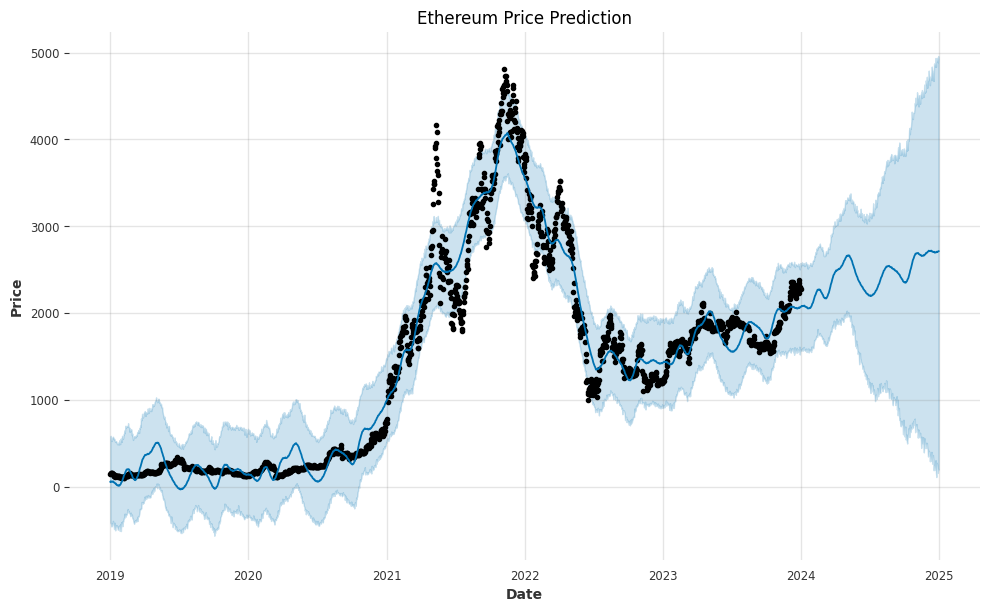

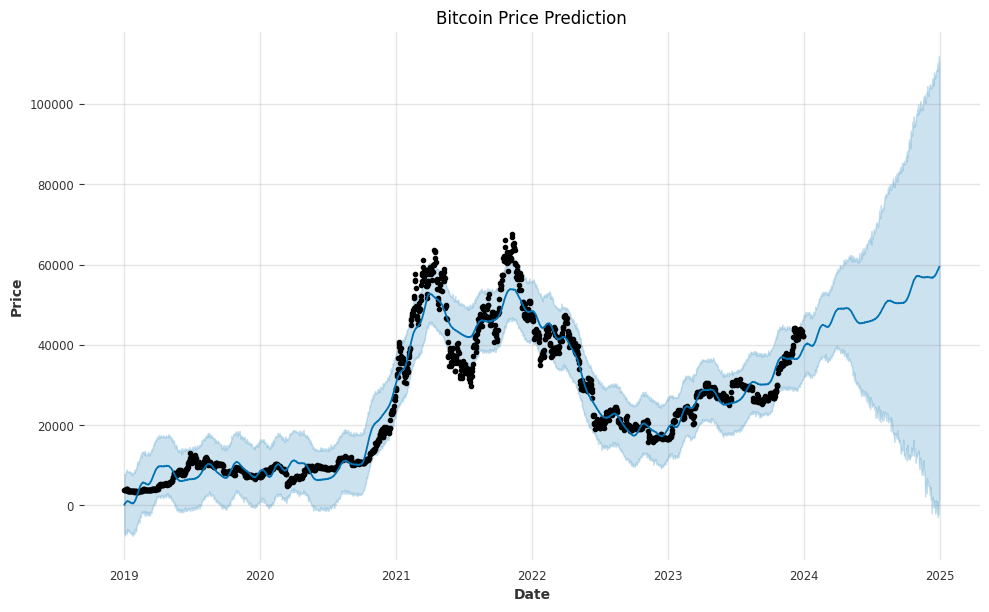

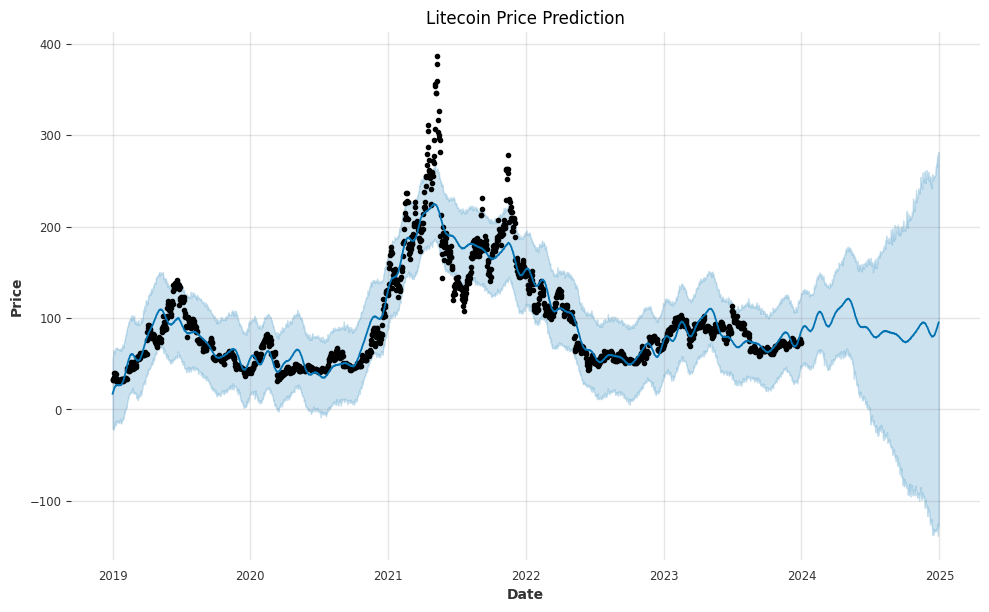

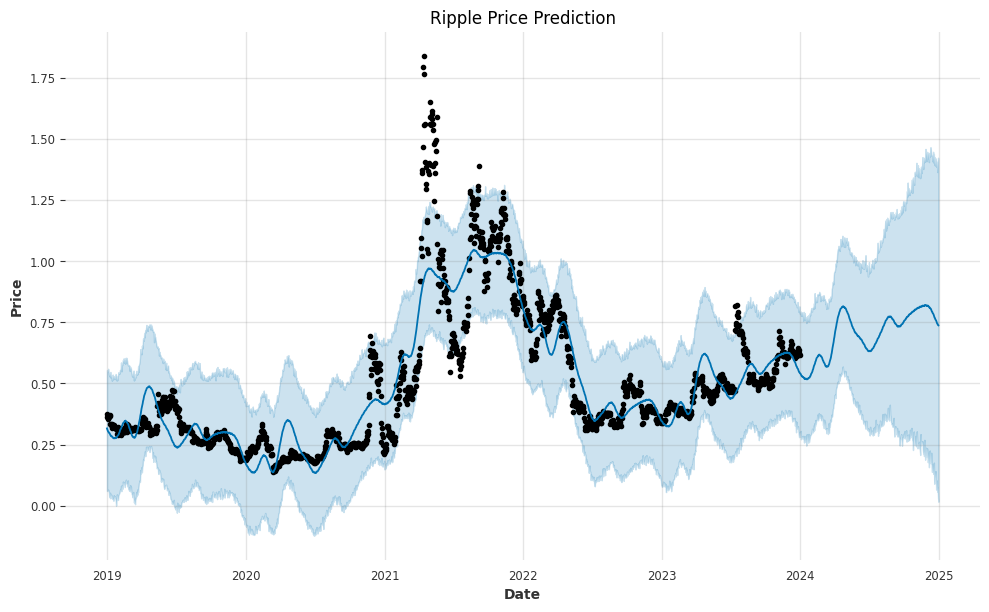

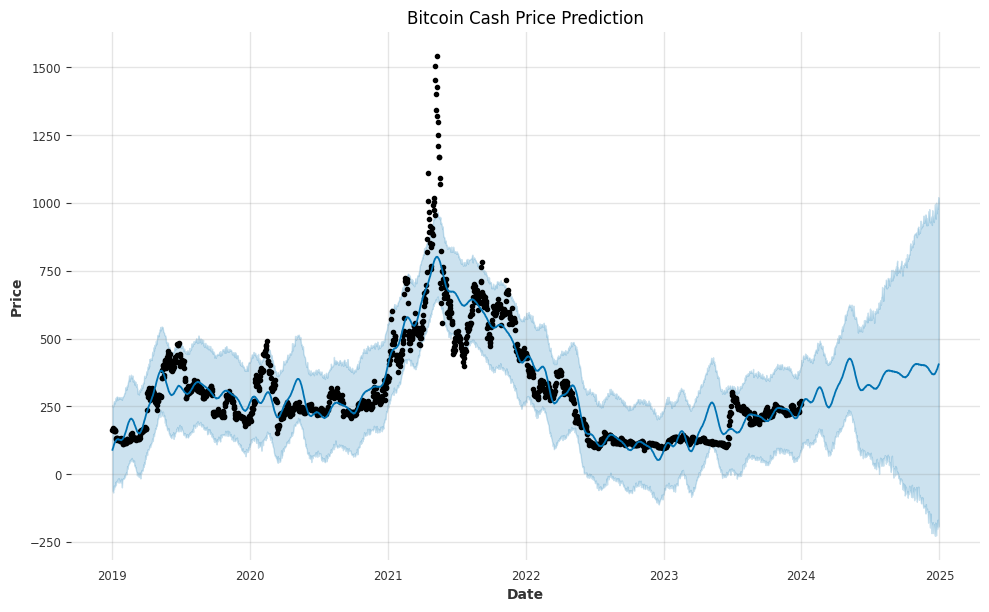

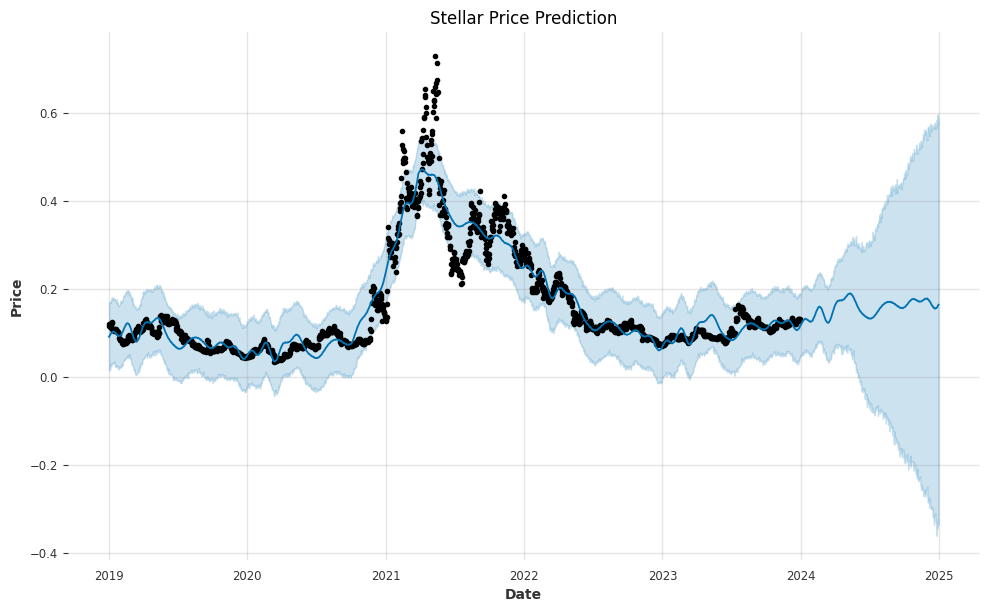

In [4]:
# Prepare data for Prophet model
# Reset index of dataframe
eth_data.reset_index(inplace=True)
btc_data.reset_index(inplace=True)
ltc_data.reset_index(inplace=True)
xrp_data.reset_index(inplace=True)
bch_data.reset_index(inplace=True)
xlm_data.reset_index(inplace=True)

# Rename columns
eth_data.rename(columns={'Date':'ds','Close':'y'}, inplace=True)
btc_data.rename(columns={'Date':'ds','Close':'y'}, inplace=True)
ltc_data.rename(columns={'Date':'ds','Close':'y'}, inplace=True)
xrp_data.rename(columns={'Date':'ds','Close':'y'}, inplace=True)
bch_data.rename(columns={'Date':'ds','Close':'y'}, inplace=True)
xlm_data.rename(columns={'Date':'ds','Close':'y'}, inplace=True)

# Create Prophet models for Ethereum, Bitcoin, Litecoin, Ripple, Bitcoin Cash, and Stellar
eth_model = Prophet(interval_width=0.95, daily_seasonality=True)
btc_model = Prophet(interval_width=0.95, daily_seasonality=True)
ltc_model = Prophet(interval_width=0.95, daily_seasonality=True)
xrp_model = Prophet(interval_width=0.95, daily_seasonality=True)
bch_model = Prophet(interval_width=0.95, daily_seasonality=True)
xlm_model = Prophet(interval_width=0.95, daily_seasonality=True)

# Fit the model with the data
eth_model.fit(eth_data)
btc_model.fit(btc_data)
ltc_model.fit(ltc_data)
xrp_model.fit(xrp_data)
bch_model.fit(bch_data)
xlm_model.fit(xlm_data)

# Create a dataframe to hold predictions
eth_future = eth_model.make_future_dataframe(periods=365, freq='D')
btc_future = btc_model.make_future_dataframe(periods=365, freq='D')
ltc_future = ltc_model.make_future_dataframe(periods=365, freq='D')
xrp_future = xrp_model.make_future_dataframe(periods=365, freq='D')
bch_future = bch_model.make_future_dataframe(periods=365, freq='D')
xlm_future = xlm_model.make_future_dataframe(periods=365, freq='D')

# Make predictions
eth_forecast = eth_model.predict(eth_future)
btc_forecast = btc_model.predict(btc_future)
ltc_forecast = ltc_model.predict(ltc_future)
xrp_forecast = xrp_model.predict(xrp_future)
bch_forecast = bch_model.predict(bch_future)
xlm_forecast = xlm_model.predict(xlm_future)

# Plot the predictions
eth_model.plot(eth_forecast, xlabel = 'Date', ylabel = 'Price')
plt.title('Ethereum Price Prediction')
plt.show()

btc_model.plot(btc_forecast, xlabel = 'Date', ylabel = 'Price')
plt.title('Bitcoin Price Prediction')
plt.show()

ltc_model.plot(ltc_forecast, xlabel = 'Date', ylabel = 'Price')
plt.title('Litecoin Price Prediction')
plt.show()

xrp_model.plot(xrp_forecast, xlabel = 'Date', ylabel = 'Price')
plt.title('Ripple Price Prediction')
plt.show()

bch_model.plot(bch_forecast, xlabel = 'Date', ylabel = 'Price')
plt.title('Bitcoin Cash Price Prediction')
plt.show()

xlm_model.plot(xlm_forecast, xlabel = 'Date', ylabel = 'Price')
plt.title('Stellar Price Prediction')
plt.show()



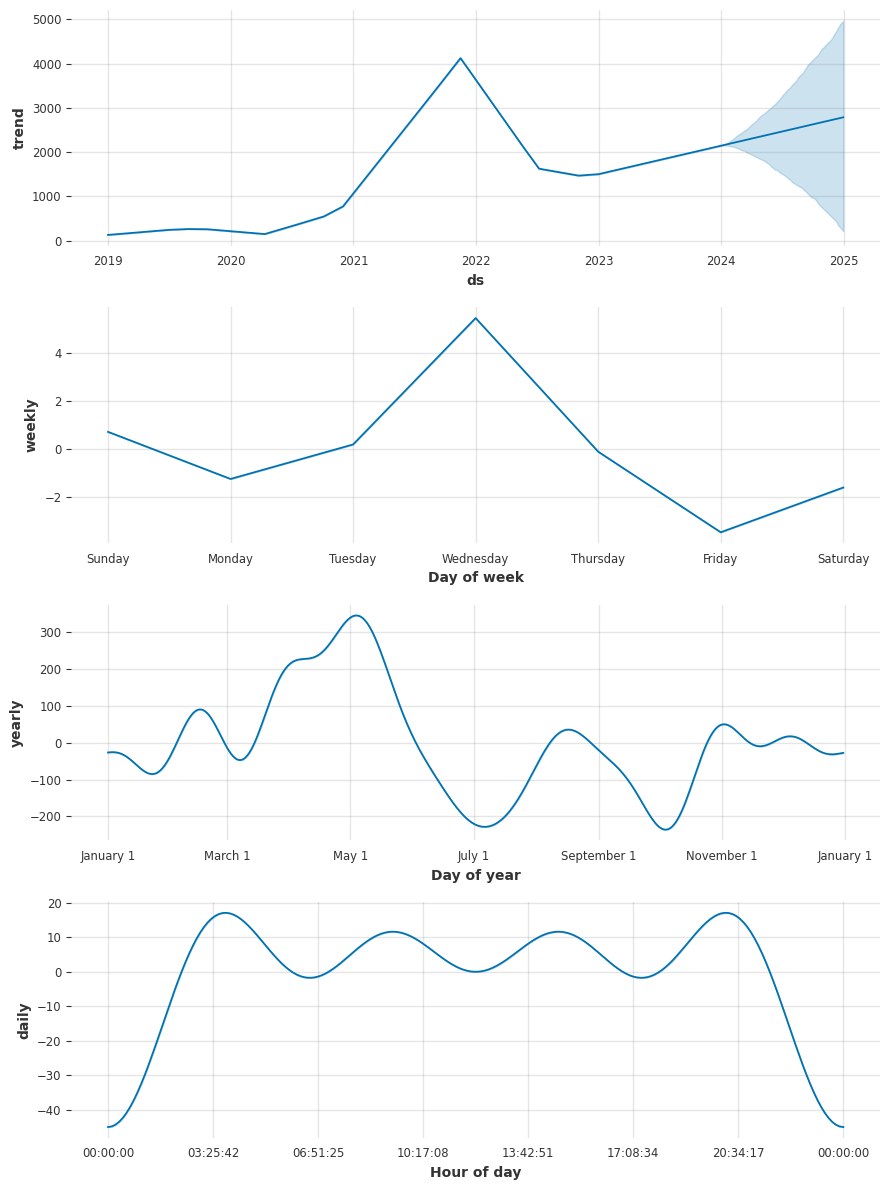

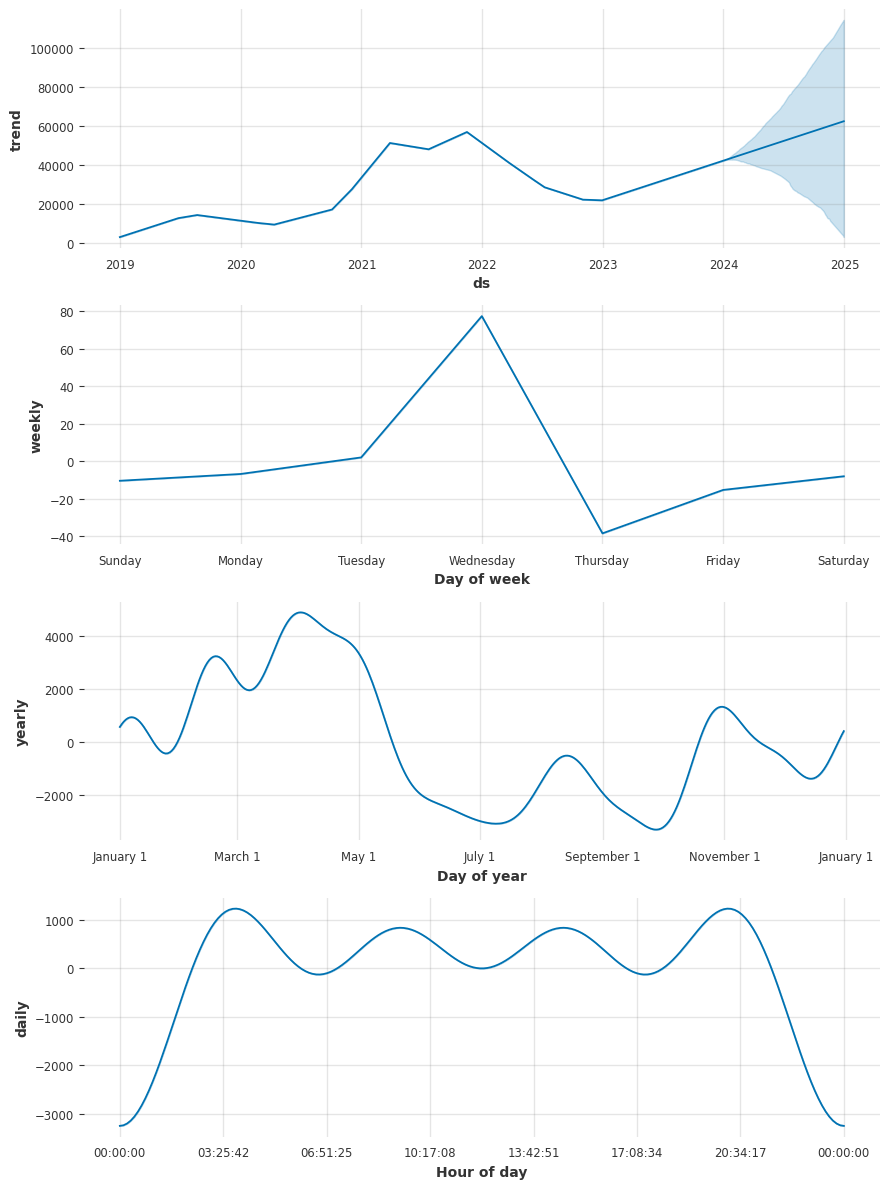

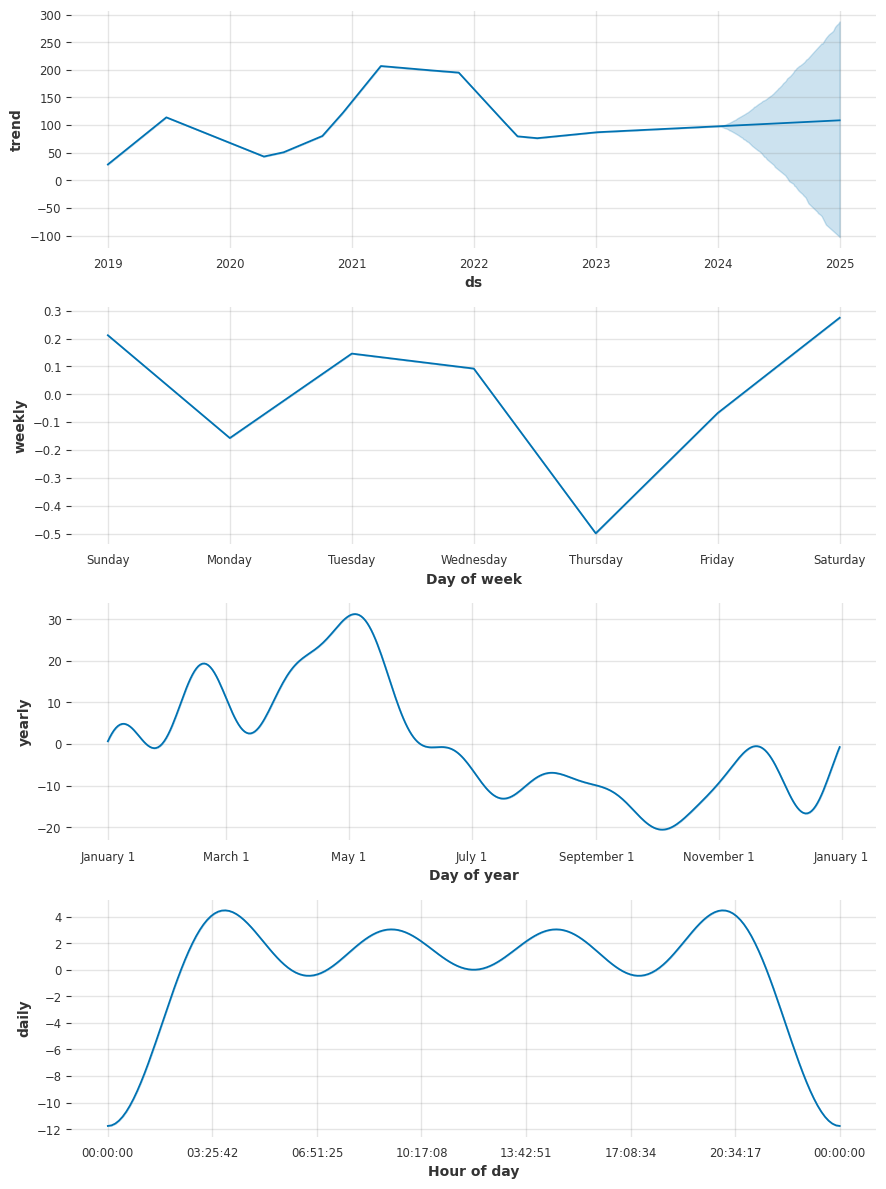

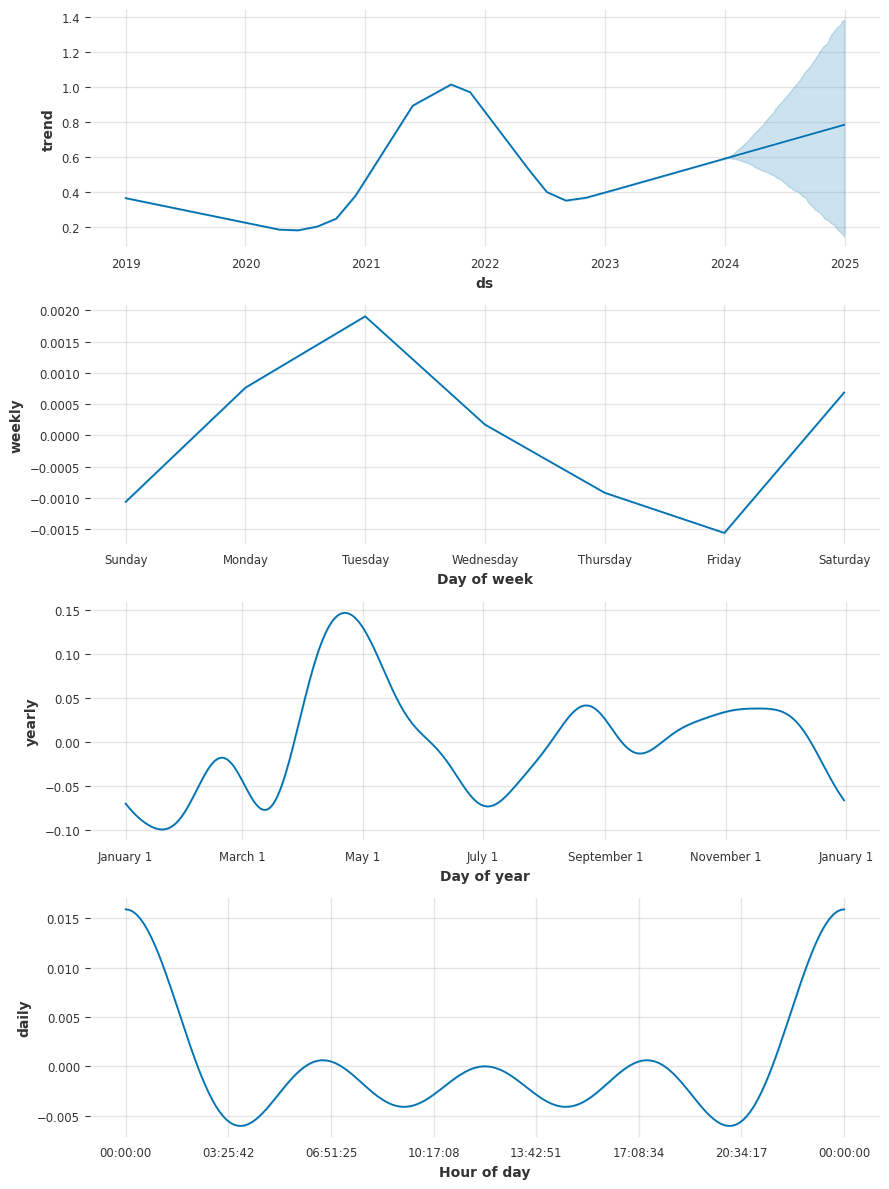

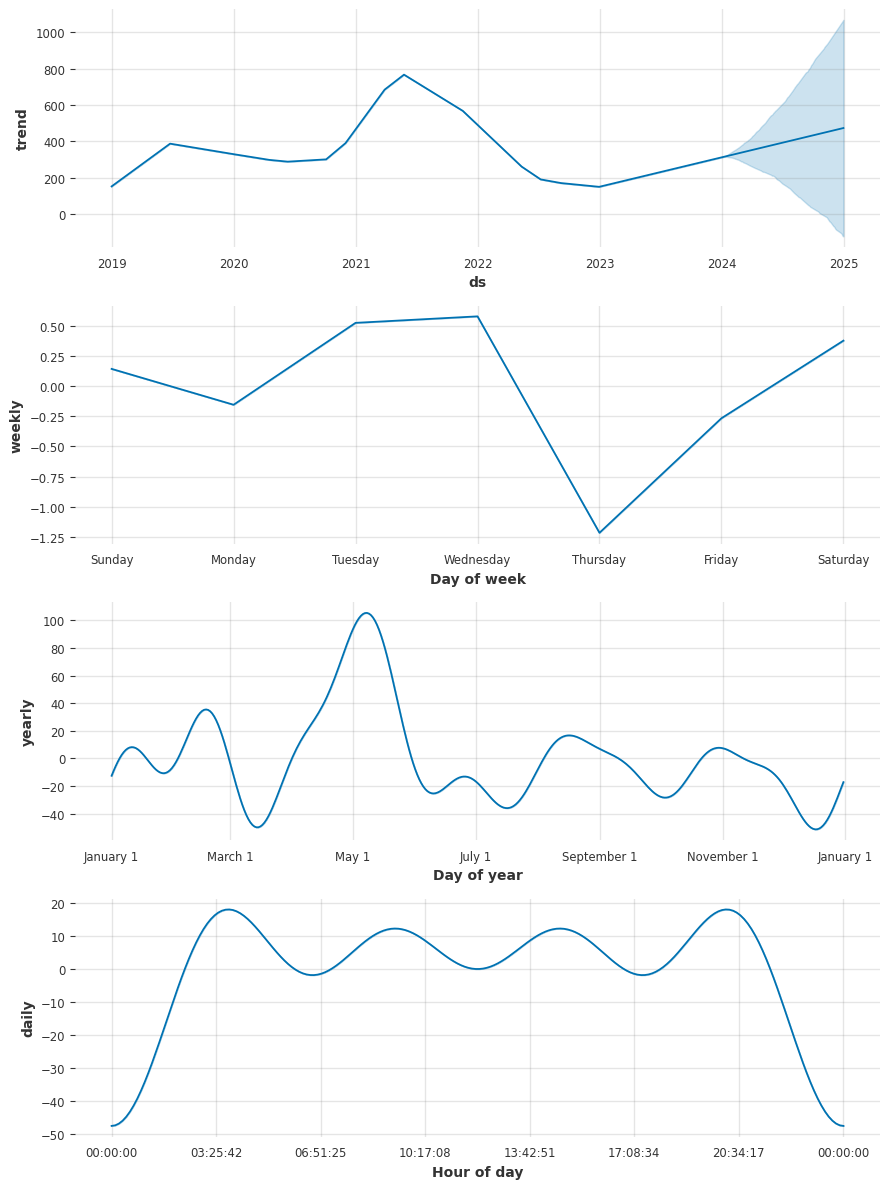

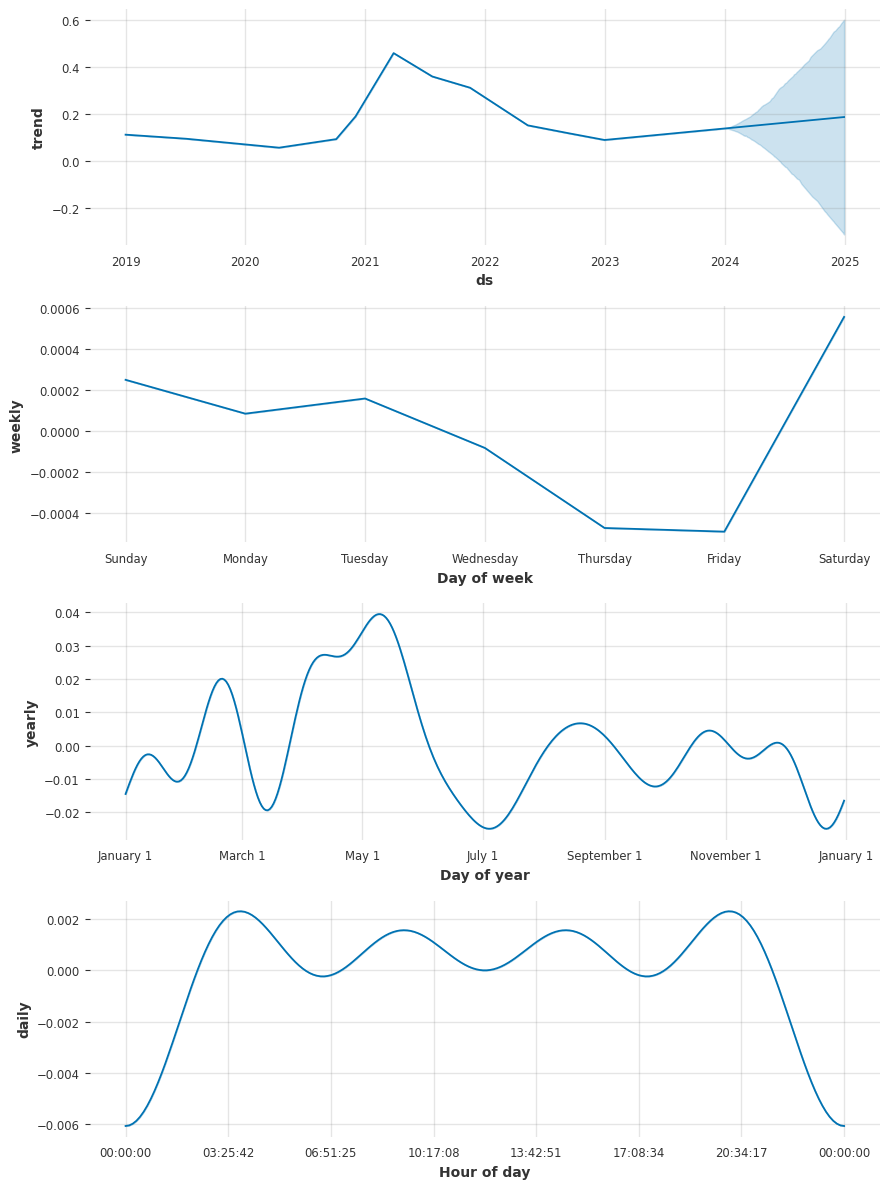

In [5]:
# Plot the components of the models and label the axes
eth_model.plot_components(eth_forecast)
plt.show()

btc_model.plot_components(btc_forecast)
plt.show()

ltc_model.plot_components(ltc_forecast)
plt.show()

xrp_model.plot_components(xrp_forecast)
plt.show()

bch_model.plot_components(bch_forecast)
plt.show()

xlm_model.plot_components(xlm_forecast)
plt.show()



c:\Users\jackie\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\jackie\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


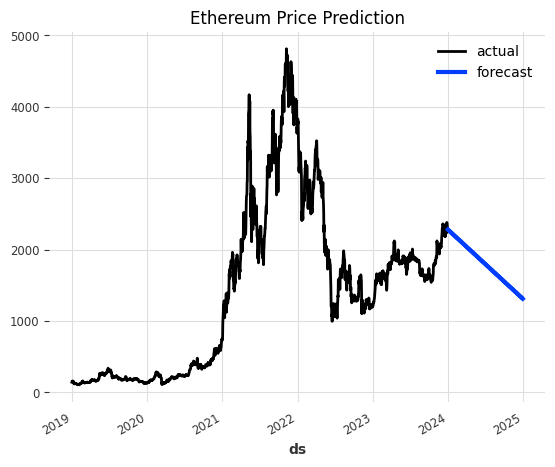

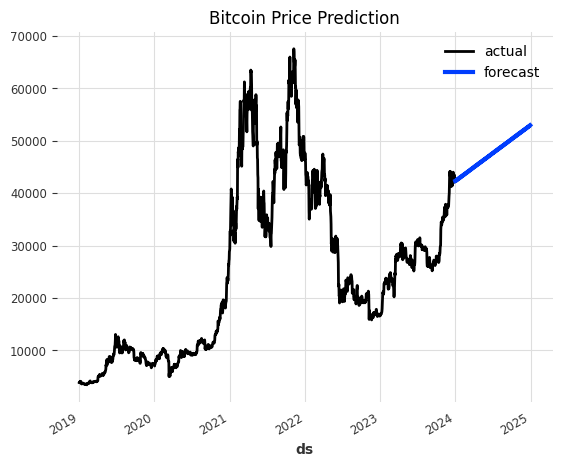

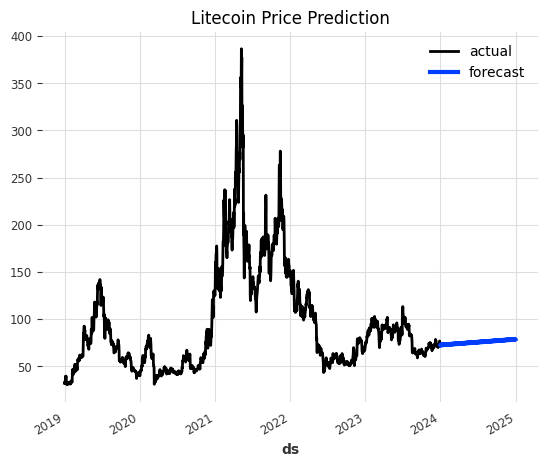

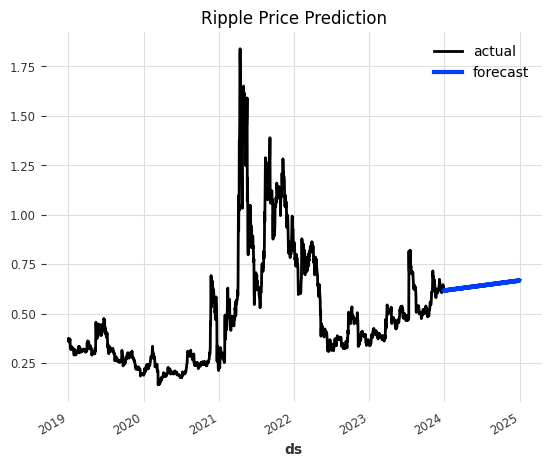

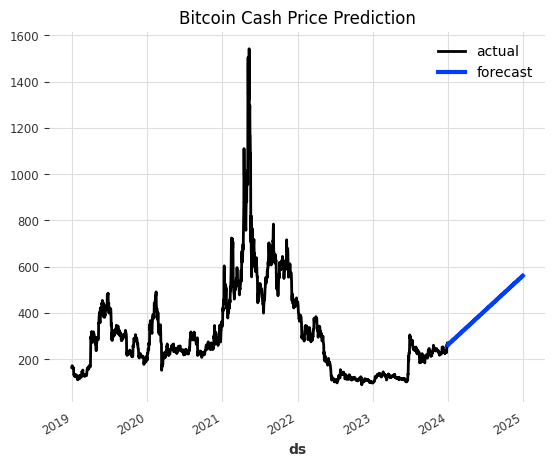

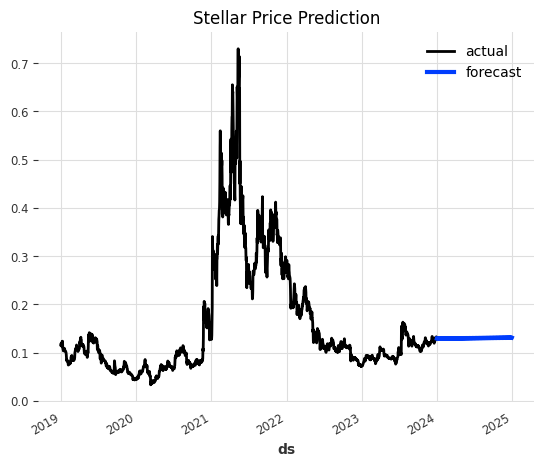

AttributeError: 'ExponentialSmoothing' object has no attribute 'plot_components'

In [6]:
# Prepare data for Darts model

# Rename columns
eth_data.rename(columns={'Date':'ds','Close':'y'}, inplace=True)
btc_data.rename(columns={'Date':'ds','Close':'y'}, inplace=True)
ltc_data.rename(columns={'Date':'ds','Close':'y'}, inplace=True)
xrp_data.rename(columns={'Date':'ds','Close':'y'}, inplace=True)
bch_data.rename(columns={'Date':'ds','Close':'y'}, inplace=True)
xlm_data.rename(columns={'Date':'ds','Close':'y'}, inplace=True)

# Create Darts models for Ethereum, Bitcoin, Litecoin, Ripple, Bitcoin Cash, and Stellar
eth_series = TimeSeries.from_dataframe(eth_data, 'ds', 'y')
btc_series = TimeSeries.from_dataframe(btc_data, 'ds', 'y')
ltc_series = TimeSeries.from_dataframe(ltc_data, 'ds', 'y')
xrp_series = TimeSeries.from_dataframe(xrp_data, 'ds', 'y')
bch_series = TimeSeries.from_dataframe(bch_data, 'ds', 'y')
xlm_series = TimeSeries.from_dataframe(xlm_data, 'ds', 'y')

# Fit the model with the data
eth_model = ExponentialSmoothing()
eth_model.fit(eth_series)
btc_model = ExponentialSmoothing()
btc_model.fit(btc_series)
ltc_model = ExponentialSmoothing()
ltc_model.fit(ltc_series)
xrp_model = ExponentialSmoothing()
xrp_model.fit(xrp_series)
bch_model = ExponentialSmoothing()
bch_model.fit(bch_series)
xlm_model = ExponentialSmoothing()
xlm_model.fit(xlm_series)

# Create a dataframe to hold predictions
eth_future = eth_model.predict(n=365)
btc_future = btc_model.predict(n=365)
ltc_future = ltc_model.predict(n=365)
xrp_future = xrp_model.predict(n=365)
bch_future = bch_model.predict(n=365)
xlm_future = xlm_model.predict(n=365)

# Plot the predictions
eth_series.plot(label='actual')
eth_future.plot(label='forecast', lw=3)
plt.title('Ethereum Price Prediction')
plt.legend()
plt.show()

btc_series.plot(label='actual')
btc_future.plot(label='forecast', lw=3)
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()

ltc_series.plot(label='actual')
ltc_future.plot(label='forecast', lw=3)
plt.title('Litecoin Price Prediction')
plt.legend()
plt.show()

xrp_series.plot(label='actual')
xrp_future.plot(label='forecast', lw=3)
plt.title('Ripple Price Prediction')
plt.legend()
plt.show()

bch_series.plot(label='actual')
bch_future.plot(label='forecast', lw=3)
plt.title('Bitcoin Cash Price Prediction')
plt.legend()
plt.show()

xlm_series.plot(label='actual')
xlm_future.plot(label='forecast', lw=3)
plt.title('Stellar Price Prediction')
plt.legend()
plt.show()

# Plot the components of the models and label the axes
eth_model.plot_components(eth_series)
plt.show()

btc_model.plot_components(btc_series)
plt.show()

ltc_model.plot_components(ltc_series)
plt.show()

xrp_model.plot_components(xrp_series)
plt.show()

bch_model.plot_components(bch_series)
plt.show()

xlm_model.plot_components(xlm_series)
plt.show()


In [7]:
# Create a drop down menu for the user to select the cryptocurrency using tkinter
root = tk.Tk()
root.title("Cryptocurrency Forecasting")
root.geometry("1920x1080")
root.configure(bg='#2d2d2d')
root.resizable(False, False)

def fetch_data():
    symbol = variable.get()
    data = yf.download(symbol, start='2023-01-01', end='2024-01-01')
    print(data.head())  # Print the first few rows of the fetched data

# Create a label for the drop down menu
label = ttk.Label(root, text="Select a Cryptocurrency:", background='#2d2d2d', foreground='#ffffff')
label.pack(pady=10)

# Create a list of cryptocurrencies
crypto = ['Bitcoin', 'Ethereum', 'Ripple', 'Litecoin', 'Bitcoin Cash', 'Stellar']

# Create a drop down menu
crypto_var = tk.StringVar()
crypto_var.set(crypto[0])
crypto_menu = ttk.OptionMenu(root, crypto_var, *crypto)
crypto_menu.pack(pady=20)

# Create a button to fetch data
fetch_button = tk.Button(root, text="Fetch Data", command=fetch_data)
fetch_button.pack()

# Run the program
root.mainloop()


